In [58]:
import numpy as np
import matplotlib.pyplot as plt

class SharedLinkDistribution:
    def __init__(self):
        self.d = {}
        
    def p(self, n, nX, nY, nSh):
        if nX < nY:
            nX, nY = nY, nX
        
        key = (n, nX, nY, nSh)
        nShMax = np.min([nX, nY])
        nShMin = np.max([0, nX + nY - n])
        minInt = np.min(key)
        
        if (minInt < 0) or (nSh < nShMin) or (nSh > nShMax) or (nX > n):
            return 0
        elif n == 0:
            return 1
        elif (n, nX, nY, nSh) in self.d.keys():
            return self.d[(n, nX, nY, nSh)]
        else:
            p00 = self.p(n-1, nX, nY, nSh)
            p10 = self.p(n-1, nX-1, nY, nSh)
            p01 = self.p(n-1, nX, nY-1, nSh)
            p11 = self.p(n-1, nX-1, nY-1, nSh-1)
            
            qx1 = nX / n
            qy1 = nY / n
            qx0 = 1 - qx1
            qy0 = 1 - qy1
            
            pRez = \
                p00 * qx0 * qy0 + \
                p10 * qx1 * qy0 + \
                p01 * qx0 * qy1 + \
                p11 * qx1 * qy1
                
            self.d[(n, nX, nY, nSh)] = pRez
            return pRez

In [51]:
nChannel = 12
sld1 = SharedLinkDistribution()
N = nChannel * (nChannel - 1)
for nX in range(N):
    for nY in range(N):
        for nSh in range(N):
            sld1.p(N, nX, nY, nSh)

In [52]:
len(sld1.d)

6918152

In [53]:
np.sum(np.array(list(sld1.d.values())) == 0)

0

In [55]:
l1 = [sld1.p(132, 83, 93, i) for i in range(0, N)] 

In [56]:
np.sum(l1)

0.9999999999999999

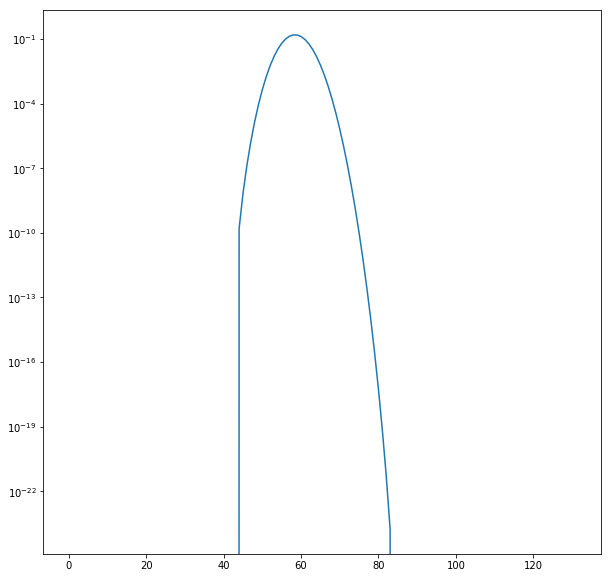

In [62]:
plt.figure(figsize=(10,10))
plt.semilogy(l1)
plt.show()